In [47]:
# import pandas and pyplot and random
import pandas as pd
import matplotlib.pyplot as plt
import random

In [48]:
# read in notebook-2/LargestCompanies.csv
# Note that the file is in the same directory as this notebook!

# While in a script, file paths are relative to where the script is run...
# ...in a notebook, file paths are relative to the notebook
companies = pd.read_csv('LargestCompanies.csv')
companies

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,2801388224512,171.66,United States
1,2,Microsoft,MSFT,2256182968320,300.95,United States
2,3,Saudi Aramco,2222.SR,1973864961187,9.88,Saudi Arabia
3,4,Alphabet (Google),GOOG,1838538817536,2778.76,United States
4,5,Amazon,AMZN,1607290585088,3158.71,United States
...,...,...,...,...,...,...
5938,5939,Rhodium Enterprises,RHDM,0,0.00,United States
5939,5940,Samsara Vision,SMSA,0,0.00,United States
5940,5941,Verdant Earth Technologies,VDNT,0,0.00,Australia
5941,5942,Direct Digital Holdings,DRCT,0,0.00,United States


In [49]:
# Put the market cap into a more manageable scale.
companies["marketcap"] = round(companies["marketcap"] / 1_000_000_000_000, 2)
companies

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,2.80,171.66,United States
1,2,Microsoft,MSFT,2.26,300.95,United States
2,3,Saudi Aramco,2222.SR,1.97,9.88,Saudi Arabia
3,4,Alphabet (Google),GOOG,1.84,2778.76,United States
4,5,Amazon,AMZN,1.61,3158.71,United States
...,...,...,...,...,...,...
5938,5939,Rhodium Enterprises,RHDM,0.00,0.00,United States
5939,5940,Samsara Vision,SMSA,0.00,0.00,United States
5940,5941,Verdant Earth Technologies,VDNT,0.00,0.00,Australia
5941,5942,Direct Digital Holdings,DRCT,0.00,0.00,United States


In [50]:
# drop the "rank" column
companies.drop(columns=["Rank"], inplace=True)
# or:
# companies.drop("Rank", axis=1, inplace=True)
companies

,Name,Symbol,marketcap,price (USD),country
0,Apple,AAPL,2.80,171.66,United States
1,Microsoft,MSFT,2.26,300.95,United States
2,Saudi Aramco,2222.SR,1.97,9.88,Saudi Arabia
3,Alphabet (Google),GOOG,1.84,2778.76,United States
4,Amazon,AMZN,1.61,3158.71,United States
...,...,...,...,...,...
5938,Rhodium Enterprises,RHDM,0.00,0.00,United States
5939,Samsara Vision,SMSA,0.00,0.00,United States
5940,Verdant Earth Technologies,VDNT,0.00,0.00,Australia
5941,Direct Digital Holdings,DRCT,0.00,0.00,United States


In [51]:
# drop all rows with a price of 0:
companies = companies[companies["price (USD)"] != 0]
# or, using .drop:
# indexes_to_drop = companies[companies["price (USD)"] == 0].index
# companies.drop(indexes_to_drop, inplace=True)
# or, using .drop in one line:
# companies.drop(companies[companies["price (USD)"] == 0].index, inplace=True)
companies

,Name,Symbol,marketcap,price (USD),country
0,Apple,AAPL,2.80,171.66,United States
1,Microsoft,MSFT,2.26,300.95,United States
2,Saudi Aramco,2222.SR,1.97,9.88,Saudi Arabia
3,Alphabet (Google),GOOG,1.84,2778.76,United States
4,Amazon,AMZN,1.61,3158.71,United States
...,...,...,...,...,...
5923,JanOne,JAN,0.00,2.99,United States
5924,Youngevity International,YGYI,0.00,0.19,United States
5925,Pareteum Corporation,TEUM,0.00,0.03,United States
5926,Ra Medical Systems,RMED,0.00,0.36,United States


In [52]:
# get company with the highest price
max_price = companies["price (USD)"].max()
companies[ companies["price (USD)"] == max_price ]

,Name,Symbol,marketcap,price (USD),country
6,Berkshire Hathaway,BRK-A,0.71,474900.0,United States


In [53]:
# get average price
avg_price = companies["price (USD)"].mean()
avg_price

172.08924595141704

In [54]:
# how many companies have a price under 100?
companies[ companies["price (USD)"] < 100 ].shape[0]
# or:
# companies[ companies["price (USD)"] < 100 ].count().iloc[0]

5115

In [55]:
# what is the price for the company with the symbol "XOM"?
companies[ companies["Symbol"] == "XOM" ]["price (USD)"].values[0]

82.39

In [56]:
# get dataframe of companies grouped by country
countries = companies.groupby("country")[["marketcap"]].sum()
countries

,marketcap
country,
Argentina,0.05
Australia,1.31
Austria,0.16
BM,0.01
Bahamas,0.00
...,...
Turkey,0.04
United Arab Emirates,0.00
United Kingdom,2.51


In [57]:
# get the top 5 countries by market cap
top5 = countries.sort_values("marketcap", ascending=False)[:5]
top5

,marketcap
country,
United States,46.13
China,7.14
Japan,4.36
France,2.85
India,2.79


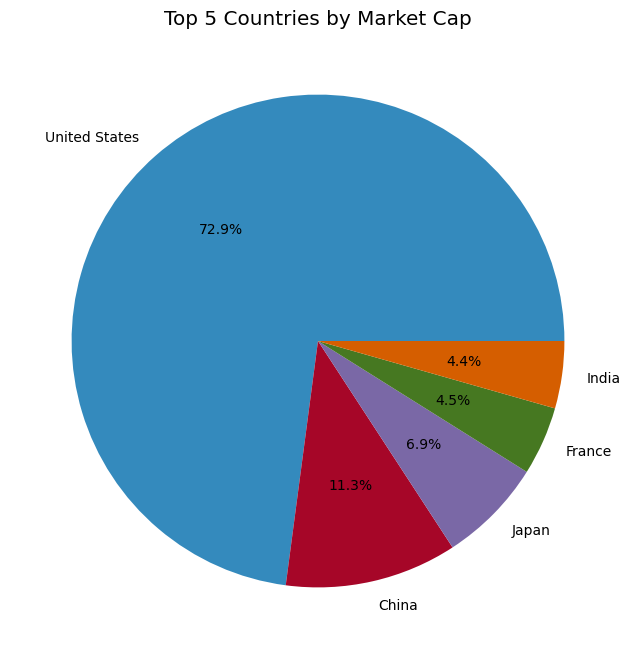

In [58]:
# plot the top 5 countries in a pie chart
top5.plot.pie(
  y="marketcap",
  legend=False,
  autopct='%1.1f%%',
  figsize=(8, 8)
)

plt.title("Top 5 Countries by Market Cap")
plt.ylabel("")
plt.show()

# More In-Depth Data Shaping

We'll be using:

- lambdas and apply to do more in-depth data shaping
- notebooks to practice and to explore our data

In [59]:
### Lambdas and Apply

# define a function that adds 5 to the input number
# define a function that adds a random number of cents to the input number
# create a dataframe with a column of numbers in the range 10000 to 10010 (inclusive)
# define the same two functions as lambdas.
# use `apply` to apply both functions to the column of numbers.
# substitute lambdas for the functions

def add5(num):
    """Add 5 to a number."""
    return num + 5

def add_cents(num):
    """Add a random amount of cents to a number."""
    return num + round(random.random(), 2)

nums = pd.DataFrame({
    "numbers": list(range(10000, 10011))
})

# nums["numbers"] = nums["numbers"].apply(add5)
nums["numbers"] = nums["numbers"].apply(lambda x: x + 5)
# nums["numbers"] = nums["numbers"].apply(add_cents)
nums["numbers"] = nums["numbers"].apply(lambda x: x + round(random.random(), 2))


In [60]:
# challenge: use BOTH a named function and apply, and, separately, a lambda function and apply to replace each number in the "numbers" with a string with a dollar sign. For example, 10000.56 should become "$10000.56" and 10001.05 should become "$10001.05".
# bonus: add commas where appropriate and keep the numbers to 2 past the decimal point, so that 10000.56 becomes "$10,000.56" and 10001.054 becomes "$10,001.05". **WARNING**: you should re-run the block above (or run all blocks) if you want to run this block a second time when doing the bonus, since if the numbers are converted to strings, you can't use any number formatting functions on them anymore. You'll know this has happened because you'll get the following error: "ValueError: Unknown format code 'f' for object of type 'str'"


def format_currency(num):
    return f"${num}"

# function version:
# nums["numbers"] = nums["numbers"].apply(format_currency)
# lambda version:
# nums["numbers"] = nums["numbers"].apply(lambda x: f"${x}")
# bonus version:
nums["numbers"] = nums["numbers"].apply(lambda x: f"${x:,.2f}")
nums

,numbers
0,"$10,005.91"
1,"$10,006.24"
2,"$10,007.10"
3,"$10,008.18"
4,"$10,009.11"
5,"$10,010.08"
6,"$10,011.99"
7,"$10,012.35"
8,"$10,013.53"
9,"$10,014.79"


In [61]:
stocks = pd.read_csv('nasdaq.csv')
stocks

,Company,Symbol,Index Weight,Last Price,Volume
0,Microsoft,MSFT,11.74%,460.36,2.24M
1,Nvidia,NVDA,11.31%,135.13,6.38M
2,Apple,AAPL,10.29%,200.85,62.80M
3,Amazon,AMZN,7.47%,205.01,64.35M
4,Alphabet Inc. (Class C),GOOG,7.20%,172.85,5.97M
5,Alphabet Inc. (Class A),GOOGL,7.15%,171.74,7.00M
6,Meta Platforms,META,5.59%,647.49,8.12M
7,Broadcom Inc.,AVGO,3.90%,242.07,3.71M
8,Tesla,TSLA,3.83%,346.46,0.72M
9,Netflix,NFLX,1.76%,1207.23,2.22M


In [62]:
# challenge: use the .apply method and a lambda function to convert Index Weight to a decimal number.
stocks["Index Weight"] = stocks["Index Weight"].apply(lambda x: float(x.strip('%')))
stocks

,Company,Symbol,Index Weight,Last Price,Volume
0,Microsoft,MSFT,11.74,460.36,2.24M
1,Nvidia,NVDA,11.31,135.13,6.38M
2,Apple,AAPL,10.29,200.85,62.80M
3,Amazon,AMZN,7.47,205.01,64.35M
4,Alphabet Inc. (Class C),GOOG,7.20,172.85,5.97M
5,Alphabet Inc. (Class A),GOOGL,7.15,171.74,7.00M
6,Meta Platforms,META,5.59,647.49,8.12M
7,Broadcom Inc.,AVGO,3.90,242.07,3.71M
8,Tesla,TSLA,3.83,346.46,0.72M
9,Netflix,NFLX,1.76,1207.23,2.22M


In [63]:
# Challenge: use the .apply method and a lambda to convert Volume to numbers so you can calculate the total volume. "M" means million in this context, so 1.5M should become 1500000. As a bonus, do this without changing the original column.

print(stocks["Volume"].apply(lambda x: float(x.strip('M')) * 1_000_000).sum())
stocks

238400000.0


,Company,Symbol,Index Weight,Last Price,Volume
0,Microsoft,MSFT,11.74,460.36,2.24M
1,Nvidia,NVDA,11.31,135.13,6.38M
2,Apple,AAPL,10.29,200.85,62.80M
3,Amazon,AMZN,7.47,205.01,64.35M
4,Alphabet Inc. (Class C),GOOG,7.20,172.85,5.97M
5,Alphabet Inc. (Class A),GOOGL,7.15,171.74,7.00M
6,Meta Platforms,META,5.59,647.49,8.12M
7,Broadcom Inc.,AVGO,3.90,242.07,3.71M
8,Tesla,TSLA,3.83,346.46,0.72M
9,Netflix,NFLX,1.76,1207.23,2.22M


In [64]:
# ternaries and lambdas

# Write a named function that, given a stock symbol string, returns "standard" if it's over 3 characters long and "short" if it's 3 characters or less.
def stock_length(symbol):
    if len(symbol) > 3:
        return "standard"
    else:
        return "short"
    
# Rewrite the above function to use a ternary operator.
def stock_length_ternary(symbol):
    answer = "standard" if len(symbol) > 3 else "short"
    return answer

# Skip the intermediate variable and write the above function as a one-liner.
def stock_length_one_liner(symbol):
    return "standard" if len(symbol) > 3 else "short"

# Now let's rewrite the function as a lambda function.
f = lambda symbol: "standard" if len(symbol) > 3 else "short"

# Use the above lambda function to create a series of stock lengths from the "Symbol" column in the stocks dataframe.
stocks["Symbol"].apply(lambda symbol: "standard" if len(symbol) > 3 else "short")

0     standard
1     standard
2     standard
3     standard
4     standard
5     standard
6     standard
7     standard
8     standard
9     standard
10    standard
11    standard
12    standard
13    standard
14    standard
15       short
16       short
17    standard
18    standard
19       short
Name: Symbol, dtype: object

In [65]:
# challenge: create a column called "Advice" that contains "buy" if the stock price is under 200 and "sell" if it's at least 200. Use apply and a lambda function with a ternary.
stocks["Advice"] = stocks["Last Price"].apply(lambda price: "buy" if price < 200 else "sell")
stocks

,Company,Symbol,Index Weight,Last Price,Volume,Advice
0,Microsoft,MSFT,11.74,460.36,2.24M,sell
1,Nvidia,NVDA,11.31,135.13,6.38M,buy
2,Apple,AAPL,10.29,200.85,62.80M,sell
3,Amazon,AMZN,7.47,205.01,64.35M,sell
4,Alphabet Inc. (Class C),GOOG,7.20,172.85,5.97M,buy
5,Alphabet Inc. (Class A),GOOGL,7.15,171.74,7.00M,buy
6,Meta Platforms,META,5.59,647.49,8.12M,sell
7,Broadcom Inc.,AVGO,3.90,242.07,3.71M,sell
8,Tesla,TSLA,3.83,346.46,0.72M,sell
9,Netflix,NFLX,1.76,1207.23,2.22M,sell


# Our Goal

Create a bar graph of the top 5 items by total revenue for that item.

In [66]:
# Read in our chipotle data from chipotle.csv
chipotle = pd.read_csv('chipotle.csv')
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [67]:
# Order price is more accurately called "item_price", so rename the column.
chipotle.rename(columns={"order_price": "item_price"}, inplace=True)
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [68]:
# What was the most expensive item in an order?
chipotle["item_price_as_number"] = chipotle["item_price"].apply(lambda price: float(price.strip("$")))
most_expensive = chipotle["item_price_as_number"].max()
chipotle[ chipotle["item_price_as_number"] == most_expensive ]

,order_id,quantity,item_name,choice_description,item_price,item_price_as_number
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25


In [69]:
# Use groupby to find how many times someone ordered the chicken bowl.
items_ordered = chipotle.groupby("item_name")["quantity"].sum()
items_ordered.loc["Chicken Bowl"]

761

In [70]:
# Use groupby to get total revenue for the chicken bowl.
revenue = chipotle.groupby("item_name")["item_price_as_number"].sum()
revenue.loc["Chicken Bowl"]

7342.7300000000005

In [76]:
# get top sellers by revenue
top_10 = revenue.nlargest(10)
top_10

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Chicken Salad Bowl     1228.75
Chicken Soft Tacos     1108.09
Veggie Burrito          934.77
Barbacoa Burrito        894.75
Veggie Bowl             867.99
Name: item_price_as_number, dtype: float64

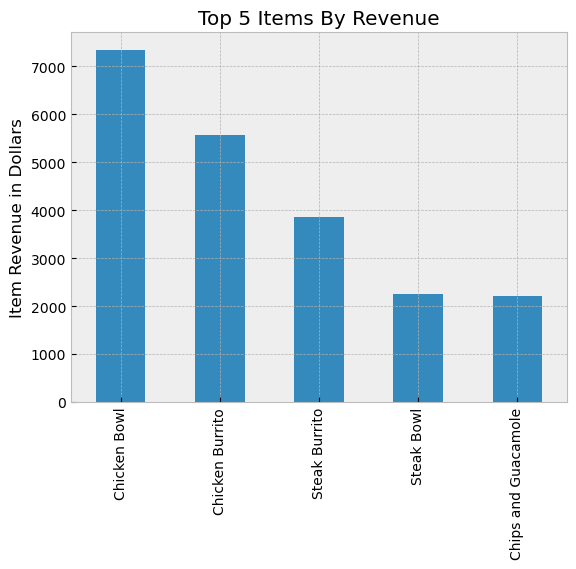

In [72]:
sorted_revenue[:5].plot.bar()
plt.style.use("bmh")
plt.ylabel("Item Revenue in Dollars")
plt.title("Top 5 Items By Revenue")
plt.xlabel("")
plt.show()

In [ ]:
# Write the following code into the `app.py` file in the same directory as this notebook. Make sure it's in the `notebook-2` folder!

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash()
app.layout = html.H1("Hello, Dash!")
app.run(debug=True)

ModuleNotFoundError: No module named 'dash'

### Running Our Code

We'll be able to follow a slimmed-down version of the setup we had for the previous file, since we've already created and configured our environment and installed the necessary packages.

Open a terminal. If you still have the terminal open from the previous file, you can use that one.

Double-check that you're in the right directory. The path part of your prompt should say `C:\Users\username\Downloads\data-visualization-curriculum-main` on Windows and simply `data-visualization-curriculum-main` on macOS.

If it does not, then you can:

1. Type in `cd C:\Users\username` on Windows (with your username in place of "username") or `cd ~` on macOS, and hit Return/Enter.
2. Type in `cd Downloads/data-visualization-curriculum-main` on either platform and hit Return/Enter.

If it does _not_ says `(dv-env)` at the left of the prompt, then your data visualization python environment is not active, and you need to run the command `conda activate dv-env` to make it active.

If your prompt says you're in the right directory and you have the right python environment active, then you can run the following command to start our Dash app:

`python notebook-2/app.py`

Then double-check that it's displaying our message by going to the URL it provides. If it does, then you're ready for the next step!

### Reading in the Data

We'll be using the chipotle data again, but this time we'll be reading it in in a file.

##### Creating the DataFrame

Back in your `app.py` file, import the `pandas` library and read in the data from the `chipotle.csv` file. Create a DataFrame with the top 5 best sellers by revenue.  For now, just print the DataFrame. Your code should look something like this:

In [ ]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

ordered_items = pd.read_csv("notebook-2/chipotle.csv")
ordered_items["item_price_as_number"] = ordered_items["order_price"].apply(lambda price: float(price.strip("$")))
item_revenue = ordered_items.groupby("item_name")["item_price_as_number"].sum()
top_5 = item_revenue.nlargest(5)
print(top_5)

app = Dash()
app.layout = html.H1("Hello, Dash!")
app.run(debug=True)

### Graphing Our Data

Let's add a pie chart of our data. Add the following code after our DataFrame work but before our Dash code.

Note that the index here is the item names, and the values are the total revenue for each item.

In [ ]:
pie_figure = px.pie(
  top_5,
  values="item_price",
  names=top_5.index,
)

Now, in our Dash code, change the `html.H1` to an `html.Div`, and use `dcc.Graph` with the pie chart passed in as the figure. The Dash code should look something like this:

In [ ]:
app = Dash()
app.layout = html.Div(dcc.Graph(figure=pie_figure))
app.run(debug=True)

### Adding More Graphs

Let's add 3 more graphs, and then we'll have some content with which to explore Dash's Bootstrap layout and styling features.

First, add a bar chart, a horizontal bar chart, and a scatter plot to your code.

In [ ]:
bar_figure = px.bar(
  top_5,
  x=top_5.index,
  y="item_price",
)

bar_h_figure = px.bar(
  top_5,
  x="item_price",
  y=top_5.index,
  orientation="h",
)

scatter_figure = px.scatter(
  top_5,
  x=top_5.index,
  y="item_price",
  color="item_price",
  size="item_price",
)

### Adding Multiple Graphs

To add multiple graphs, we can use the `html.Div` component to create a container for each graph. Each graph will be a `dcc.Graph` component.

The big change to make this possible is that, instead of one `dcc.Graph` component, we will have a list of `dcc.Graph` components, each with its own figure.

Change the `app.layout` line to the following:

In [ ]:
app.layout = html.Div([
  dcc.Graph(figure=pie_figure),
  dcc.Graph(figure=bar_figure),
  dcc.Graph(figure=bar_h_figure),
  dcc.Graph(figure=scatter_figure),
])

Check your results. You should have all four graphs displayed on the page, each in its own section.

In our next step, we'll use Bootstrap to arrange our graphs in two rows.

### Layout with Bootstrap

Bootstrap is a popular CSS framework that makes it easy to create responsive layouts. We'll use it to arrange our graphs in two rows.

To start, we'll need to import the `dash_bootstrap_components` library.

Use the following code in our import section at the top of `app.py` to import the necessary component, renaming it to `dbc`:

In [ ]:
import dash_bootstrap_components as dbc

Now, we'll set the `app` variable to use the Bootstrap theme by telling it to use an external stylesheet. Replace the regular call to Dash with the following code:

In [ ]:
app = Dash(external_stylesheets=[dbc.themes.COSMO])

Now we can use Bootstrap components to create our layout. We'll use the `dbc.Container`, `dbc.Row`, and `dbc.Col` components to arrange our graphs in two rows.

First, let's create a container and one row. Replace the `app.layout` line with the following code:

In [ ]:
app.layout = dbc.Container([
  dbc.Row([
    dbc.Col(dcc.Graph(figure=pie_figure), xl=6),
    dbc.Col( dcc.Graph(figure=bar_figure), xl=6),
  ]),
])

Now, let's add a second row with the remaining graphs. Update the `app.layout` line to include two rows, each with two columns:

In [ ]:
app.layout = dbc.Container([
  dbc.Row([
    dbc.Col(dcc.Graph(figure=pie_figure), xl=6),
    dbc.Col(dcc.Graph(figure=bar_figure), xl=6),
  ]),

  dbc.Row([
    dbc.Col(dcc.Graph(figure=bar_h_figure), xl=6),
    dbc.Col(dcc.Graph(figure=scatter_figure), xl=6),
  ]),
])

Try changing the size of your window to see how the graphs rearrange themselves. Bootstrap will automatically adjust the layout based on the screen size, applying the width of 6 (which is half the width of the row) to each column _only_ on "xl" screens (extra large screens, which are 1200px or wider). On smaller screens, the columns will stack vertically.

Try changing the numbers next to `xl`, taking care to always make each row's numbers add up to 12. For example, you could try `xl=4` for one column and `xl=8` for the other, which would make one column take up one-third of the row and the other two-thirds.